In [2]:
set.seed(123)
getwd()
setwd("/liulab/galib/dlbcl_manuscript/")
library(rBCS)
library(tidyverse)
library(Seurat)
library(harmony)
library(viridis)
library(RColorBrewer)
library(Polychrome)
PurpleAndYellow()
library(ComplexHeatmap)
library(devtools)
library(presto)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(readxl)
library(CytoTRACE2)
library(monocle3)
library(SeuratWrappers)
source("./scripts/scplot.R")

[1] "/liulab/galib/dlbcl_manuscript"

[1] "#FF00FF" "#F400F4" "#EA00EA" "#DF00DF" "#D500D5" "#CA00CA" "#BF00BF"
 [8] "#B500B5" "#AA00AA" "#9F009F" "#950095" "#8A008A" "#800080" "#750075"
[15] "#6A006A" "#600060" "#550055" "#4A004A" "#400040" "#350035" "#2B002B"
[22] "#200020" "#150015" "#0B000B" "#000000" "#000000" "#0B0B00" "#151500"
[29] "#202000" "#2B2B00" "#353500" "#404000" "#4A4A00" "#555500" "#606000"
[36] "#6A6A00" "#757500" "#808000" "#8A8A00" "#959500" "#9F9F00" "#AAAA00"
[43] "#B5B500" "#BFBF00" "#CACA00" "#D4D400" "#DFDF00" "#EAEA00" "#F4F400"
[50] "#FFFF00"

In [3]:
B_cell<- readRDS("./data/objects/B_cell_final.rds")

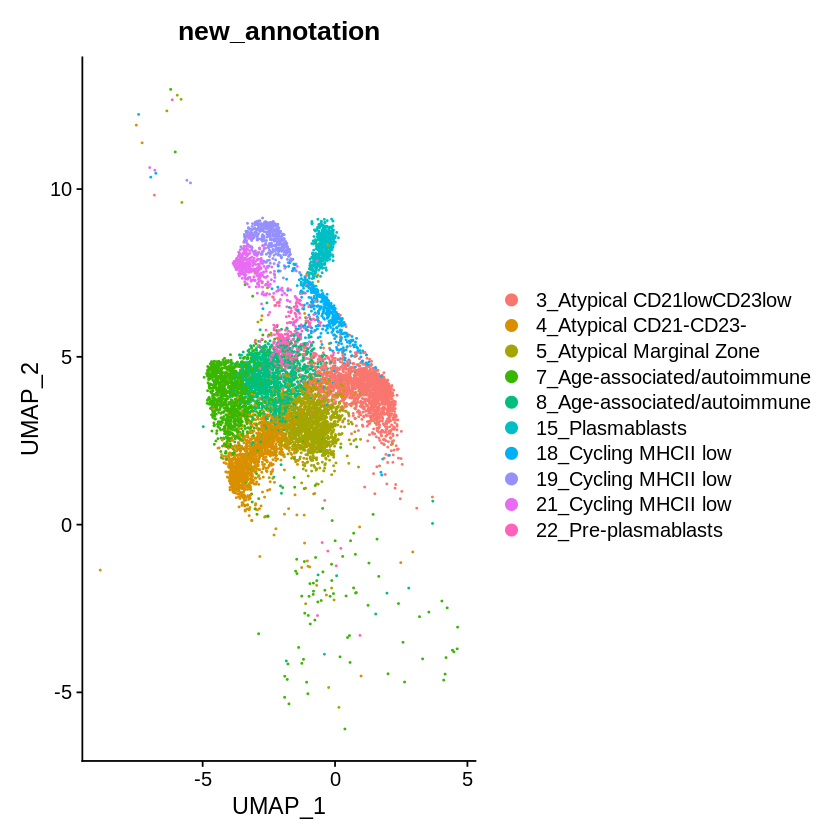

In [4]:
B_cell_subset = subset(B_cell, seurat_clusters %in% c(3, 4, 5, 7, 8, 15, 18, 19, 21, 22))
B_cell_subset<- B_cell_subset[, sample.int(ncol(B_cell_subset), size = 10000)]
DimPlot(B_cell_subset, group.by = 'new_annotation')

In [5]:
message('converting to cds... ')
cds <- as.cell_data_set(B_cell_subset)
message('reducing dimension... ')
cds <- reduce_dimension(cds)
message('clustering... ')
cds <- cluster_cells(cds, resolution = 0.5)
message('learning graphs...')

converting to cds... 

reducing dimension... 

No preprocess_method specified, using preprocess_method = 'PCA'

clustering... 

as(<dsCMatrix>, "dgCMatrix") is deprecated since Matrix 1.5-0; do as(., "generalMatrix") instead

learning graphs...



No trajectory to plot. Has learn_graph() been called yet?

Warning message:
“ggrepel: 442 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


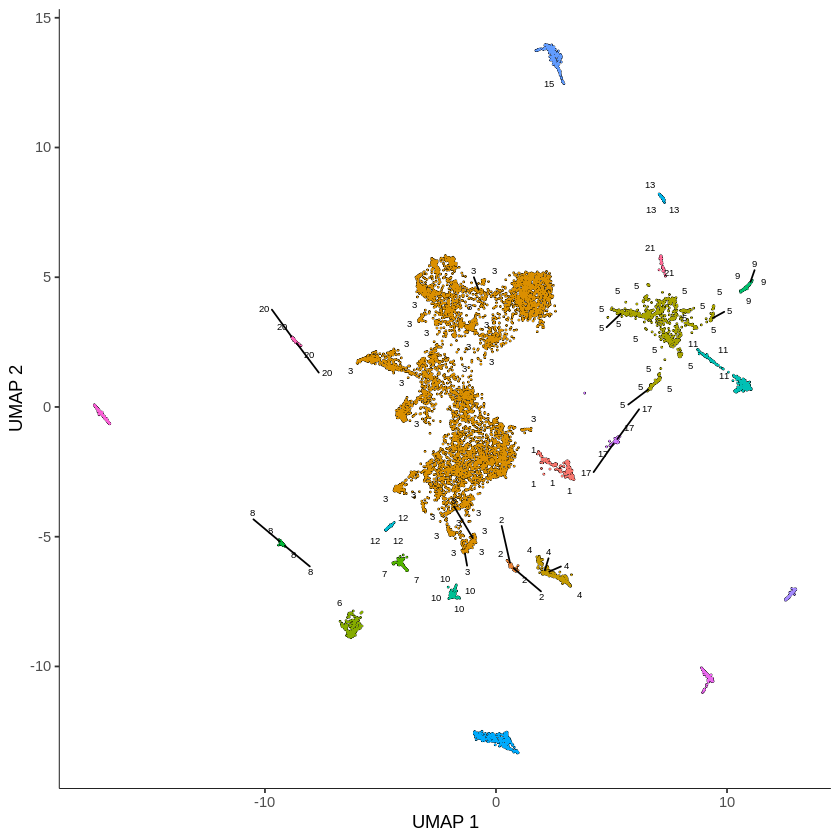

In [6]:
plot_cells(cds, color_cells_by = "partition")

In [7]:
cds <- learn_graph(cds)

Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”
Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”


  |======================================================================| 100%


Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”
Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”
Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”
Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”
Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”
Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”
Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”
Warning message in i

plotting tree...

Warning message:
“ggrepel: 469 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 471 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


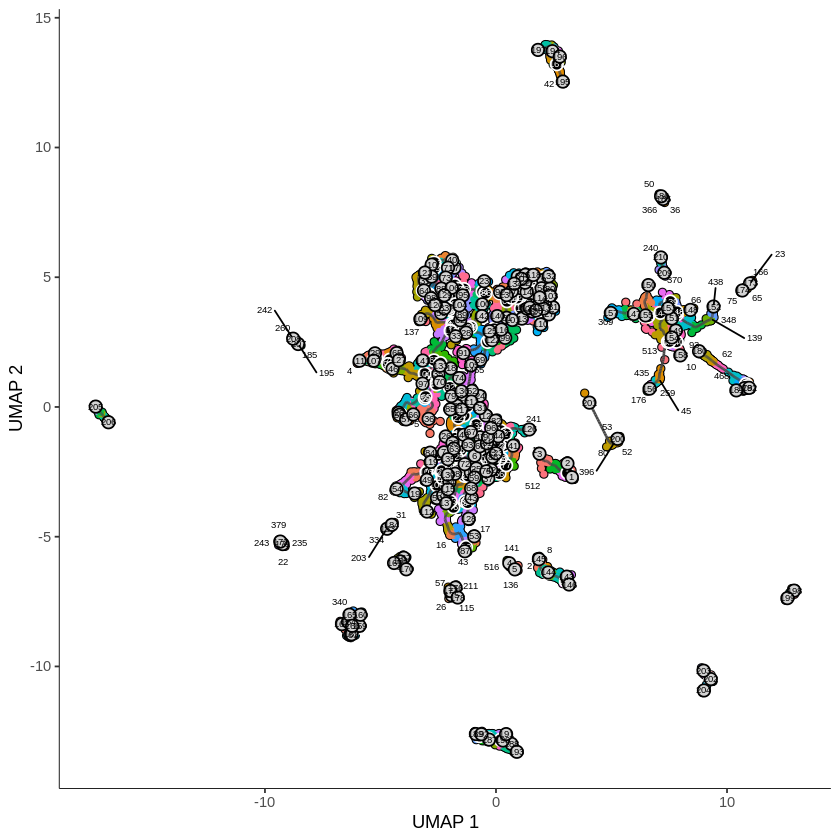

In [8]:
message('plotting tree...')
plot_cells(cds, label_leaves = TRUE, label_branch_points = TRUE, cell_size = 1.2)
ggsave(paste0('./results/figures/9_monocle3_tree_sub_clusters_res0.5.pdf'), width = 8, height = 6)

ranking cells

plotting pseudotime



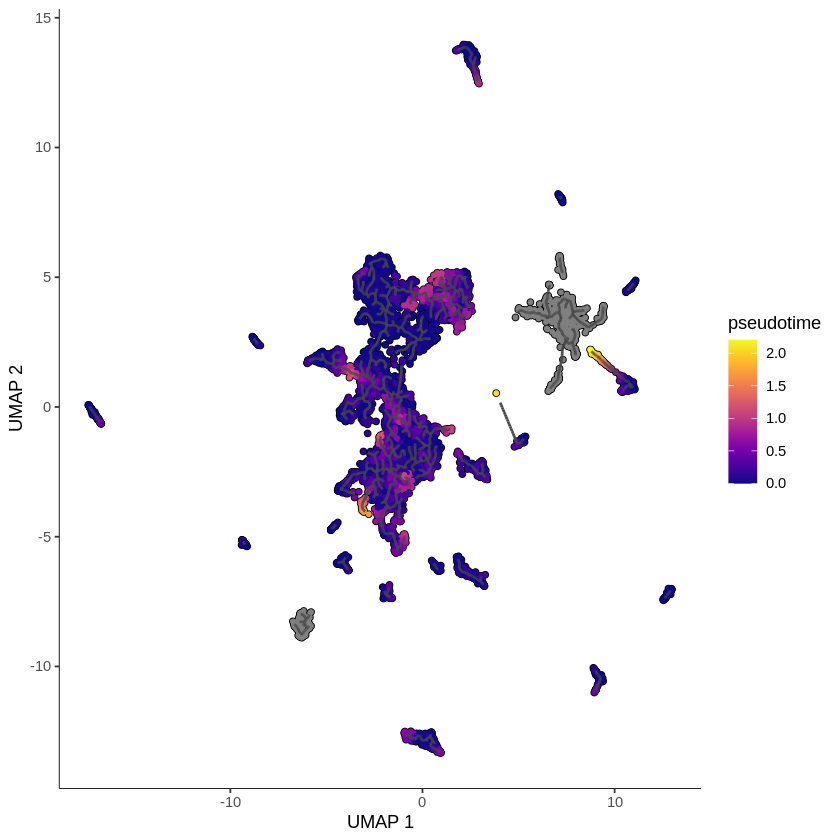

In [9]:
message('ranking cells')
root = B_cell_subset@meta.data  %>% filter(new_annotation== '5_Atypical Marginal Zone')  %>% rownames()
cds <- order_cells(cds, root_cells = root)


message('plotting pseudotime')
plot_cells(cds, color_cells_by = "pseudotime", label_cell_groups = FALSE, label_leaves = FALSE, 
    label_branch_points = FALSE, label_roots = FALSE, cell_size = 1.0)
ggsave(paste0('./results/figures/9_monocle3_pseudotime_sub_clusters_res0.5.pdf'), width = 8, height = 6)

In [10]:
message('plotting pseudotime on featureplot')

B_cell_subset@meta.data$pseudotime = pseudotime(cds)[rownames(B_cell_subset@meta.data)]
B_cell_subset@meta.data[names(pseudotime(cds)[is.infinite(pseudotime(cds))]), 'pseudotime'] = NA

plotting pseudotime on featureplot



In [11]:
p<- FeaturePlot(B_cell_subset, "pseudotime")
ggsave(filename = paste0('./results/figures/9_monocle3_pseudotime_sub_clusters_res0.5_featureplot.pdf'), plot = p, width = 8, height = 6)

In [12]:
B_cell_subset@meta.data$UMAP_1<- B_cell_subset@reductions$umap@cell.embeddings[,1]
B_cell_subset@meta.data$UMAP_2<- B_cell_subset@reductions$umap@cell.embeddings[,2]

In [14]:
B_cell_subset$pseudotime  %>% quantile(na.rm=TRUE)

0%         25%         50%         75%        100% 
0.000000000 0.009527062 0.078198042 0.275282835 2.203262523

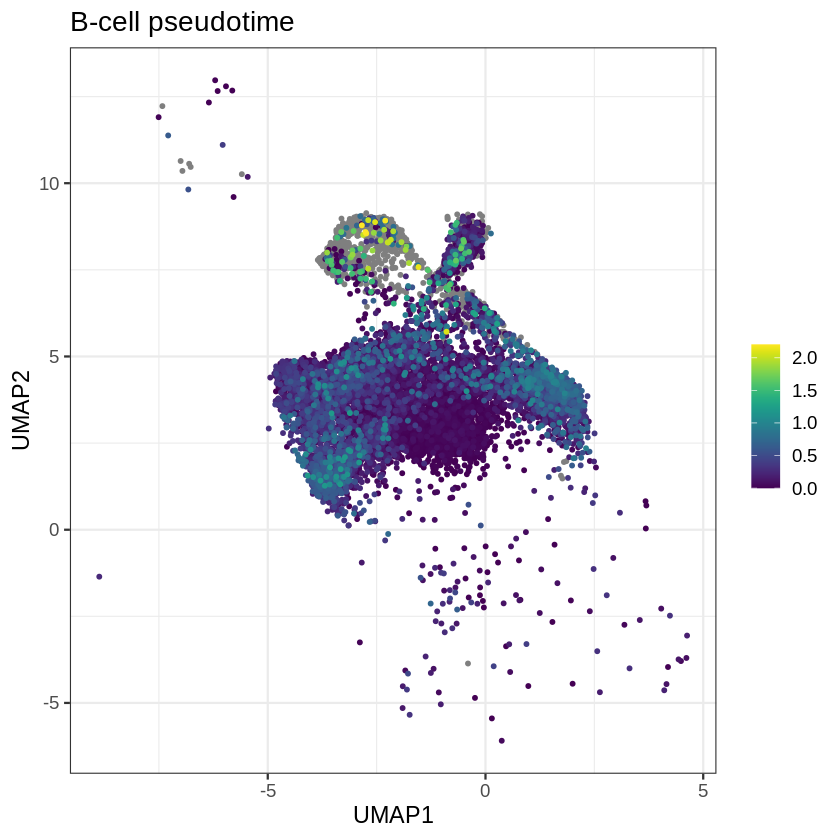

In [20]:
mycol = rev(brewer.pal(11,"RdYlBu"))
mycol = brewer.pal(9,"YlOrRd")
B_cell_subset@meta.data %>%
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>%
    mutate(is_na= !is.na(pseudotime)) %>%
    arrange(is_na, pseudotime)  %>%
    ggplot(aes(x = UMAP_1, y= UMAP_2)) +
    geom_point(aes(color = pseudotime), size = 1.0) +
    scale_color_viridis() +
    theme_bw(base_size = 14) +
    labs(x = "UMAP1", y = "UMAP2", title = "B-cell pseudotime") +
    theme(legend.title=element_blank())


ggsave("./results/figures/9_monocle3_pseudotime_sub_clusters_res0.5_umap.pdf", width = 6, height =5)

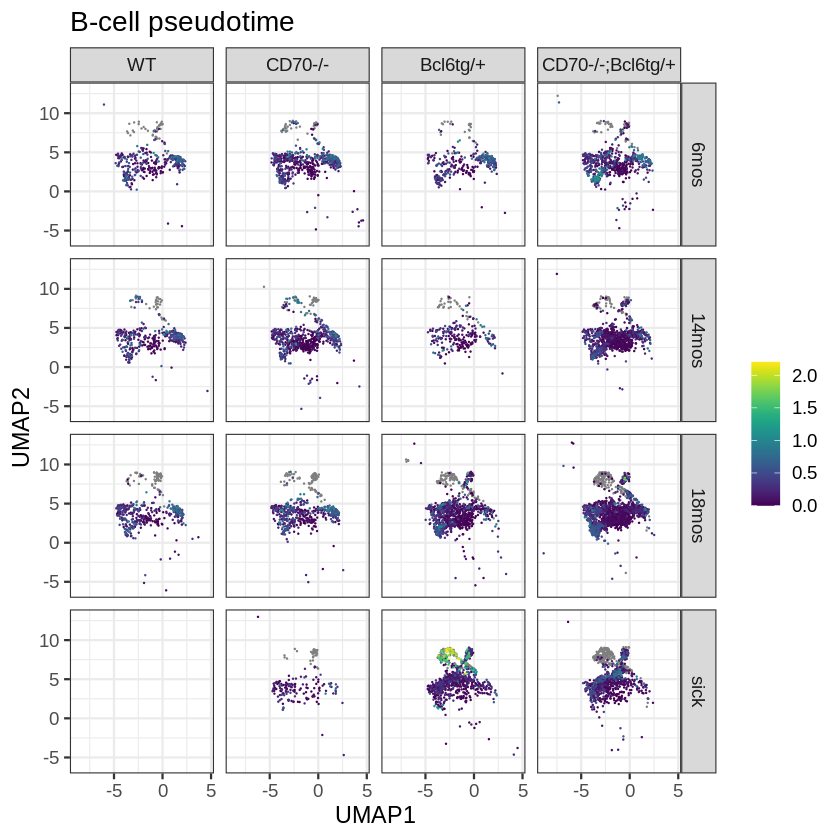

In [21]:
mycol = rev(brewer.pal(11,"RdYlBu"))
mycol = brewer.pal(11,"RdYlBu")
B_cell_subset@meta.data %>%
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>%
    mutate(is_na= !is.na(pseudotime)) %>%
    arrange(is_na, pseudotime)  %>%
    ggplot(aes(x = UMAP_1, y= UMAP_2)) +
    geom_point(aes(color = pseudotime), size = 0.05) +
    scale_color_viridis() +
    theme_bw(base_size = 14) +
    labs(x = "UMAP1", y = "UMAP2", title = "B-cell pseudotime") +
    theme(legend.title=element_blank()) +
    facet_grid(age ~ genotype)


ggsave("./results/figures/9_monocle3_pseudotime_sub_clusters_umap_by_age_by_genotype.pdf", width = 9, height =6)